# Introdução

A estatística Bayesiana oferece um conjunto poderoso de ferramentas para análise e inferência de dados, baseando-se na atualização de crenças em face de novas evidências. No cerne dessa abordagem estão o Teorema de Bayes, os métodos de Monte Carlo via Cadeias de Markov (MCMC) e ferramentas computacionais como o PyMC, que facilitam a implementação dessas metodologias complexas.

## Bayes vs Frequentismo

A estatística Bayesiana e o Frequentismo representam duas filosofias fundamentais na análise de dados e inferência estatística, cada uma com suas próprias abordagens e ênfases.

### Abordagem Programática

A estatística Bayesiana oferece uma abordagem altamente programática para a modelagem estatística, facilitando a construção de modelos complexos que podem ser diretamente implementados e ajustados em software, como o PyMC para Python. Essa capacidade programática permite aos usuários definir explicitamente prioris e modelos de forma flexível, adaptando-se facilmente a novos dados e hipóteses.

### Interpretação de Resultados e Incertezas

Um dos benefícios mais significativos da abordagem Bayesiana é sua interpretação intuitiva de resultados. Diferente do Frequentismo, que frequentemente se apoia em p-values para testar hipóteses, a estatística Bayesiana foca na probabilidade das hipóteses dados os dados observados, oferecendo uma medida direta da credibilidade das várias hipóteses.

Além disso, a estatística Bayesiana lida de forma mais natural com incertezas. Ao invés de oferecer estimativas pontuais, ela produz distribuições posteriores completas para os parâmetros de interesse, fornecendo uma visão rica da incerteza e variabilidade dos parâmetros.

### P-values e Suas Limitações

P-values, frequentemente usados na abordagem Frequentista, são complicados de interpretar e exigem um forte conhecimento prévio em testes de hipósteses. Eles medem a probabilidade de observar os dados (ou dados mais extremos) assumindo que a hipótese nula é verdadeira, o que não é o mesmo que medir a probabilidade da hipótese nula ser verdadeira dados os dados observados. P-values pequenos não necessariamente indicam um efeito forte ou relevante, apenas que a observação seria improvável se a hipótese nula fosse verdadeira. Isso pode levar a interpretações equivocadas, especialmente com relação à significância "estatística" versus relevância "prática".

### Enfoque na Distribuição versus Pontual

A principal diferença entre Bayesiana e Frequentista pode ser resumida pelo enfoque na distribuição versus o enfoque pontual. A estatística Bayesiana é centrada na distribuição; ela considera todas as possíveis valores dos parâmetros e atualiza suas crenças sobre esses parâmetros à medida que novos dados são observados. Em contraste, a estatística Frequentista geralmente se concentra em estimativas pontuais e intervalos de confiança, que podem não capturar completamente a incerteza ou a variabilidade dos parâmetros de interesse.


## PyMC

PyMC é uma biblioteca de código aberto em Python que permite aos usuários construir modelos estatísticos Bayesianos de forma eficiente e intuitiva. Com o PyMC, é possível definir prioris e funções de verossimilhança de maneira flexível, facilitando a execução de inferência Bayesiana, inclusive em modelos complexos e de alta dimensão. A biblioteca é projetada para trabalhar de forma integrada com as capacidades computacionais do NumPy e SciPy, oferecendo uma interface amigável para a estatística Bayesiana.

## MCMC (Monte Carlo via Cadeias de Markov)

MCMC é uma classe de métodos usados para amostrar de distribuições de probabilidade complexas. Utilizando a propriedade das cadeias de Markov, em que o estado futuro depende apenas do estado presente e não dos estados anteriores, MCMC permite a exploração efetiva do espaço de parâmetros de um modelo. Isso é particularmente útil em contextos Bayesianos, onde a distribuição posterior pode ser de difícil caracterização analítica. Métodos como o Metropolis-Hastings e o No-U-Turn Sampler (NUTS) estão entre as abordagens de MCMC mais conhecidas e utilizadas.

## Teorema de Bayes

O Teorema de Bayes é a pedra angular da inferência estatística Bayesiana, fornecendo um mecanismo para atualizar a probabilidade de uma hipótese à medida que mais evidências são disponibilizadas. Matematicamente, é expresso como:

$$P(\theta|D) = \frac{P(D|\theta) \cdot P(\theta)}{P(D)}$$

onde:
- \(P($\theta$|D)\) é a probabilidade dos parâmetros $\theta$ dados os dados \(D\) (probabilidade posterior ou posteriori) - Esta é a probabilidade de observarmos os parâmetros específicos $\theta$ após termos visto os dados \(D\).
- \(P(D|$\theta$)\) é a verossimilhança dos dados \(D\) dados os parâmetros $\theta$ - Mede quão prováveis são os dados observados \(D\) se os parâmetros do modelo forem $\theta$.
- \(P($\theta$)\) é a probabilidade a priori dos parâmetros $\theta$ - Representa nosso conhecimento ou crença sobre os parâmetros antes de observarmos os dados \(D\).
- \(P(D)\) é a probabilidade dos dados \(D\), também conhecida como evidência ou marginal likelihood - Atua como um fator de normalização para garantir que a probabilidade posterior some 1. Na prática, \(P(D)\) é calculada integrando (quando as distribuições são contínuas e não discretas)ou somando sobre todas as possíveis valores dos parâmetros $\theta$, ponderadas pela sua verossimilhança e pela distribuição a priori.

No caso contínuo:

$$P(\theta|D) = \frac{P(D|\theta) \cdot P(\theta)}{\int_{\theta} P(D|\theta) \cdot P(\theta) d\theta}$$

Este teorema permite incorporar conhecimento prévio (priori) na análise estatística, adaptando as crenças à medida que novos dados são analisados, o que é fundamental para a inferência Bayesiana.

A combinação dessas ferramentas e conceitos cria um ecossistema robusto para análise de dados, oferecendo insights profundos e estimativas de incerteza de maneira coerente e fundamentada.


O primeiro exemplo será como geramos város amostras de uma distribuição, nessa caso uma normal de média 1 e desvio 2.
$$X$$

In [4]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

A construção de modelos probabilísticos no PyMC é facilitada pela sintaxe `with`, que cria um contexto para definir o modelo de forma clara e concisa. Dentro deste contexto, todas as variáveis e distribuições definidas são automaticamente associadas ao modelo em questão, simplificando a estruturação e a execução da análise.

Por exemplo, ao definirmos o modelo dentro de um bloco `with pm.Model() as test:`, estamos criando uma instância do modelo chamada `test`, que posteriormente pode ser usada para realizar diversas tarefas analíticas, como gerar traceplots e outras visualizações. Este modelo inclui uma variável `x`, especificada para seguir uma distribuição Normal com média 1 e desvio padrão 2, conforme indicado por `pm.Normal("x", 1, 2)`.

Para realizar a inferência Bayesiana e gerar amostras da distribuição posterior das variáveis do modelo, utilizamos o método `pm.sample()`. Por padrão, esse processo envolve a geração de amostras a partir de múltiplas cadeias de Markov Chain Monte Carlo (MCMC), que são sequências de amostras que exploram o espaço dos parâmetros do modelo. A variável `trace` captura essas amostras, armazenando os resultados do processo de amostragem.

No caso padrão, `pm.sample()` gera amostras de duas cadeias (chains) paralelas, com 2000 amostras cada. Essas cadeias são independentes entre si e iniciam de pontos diferentes no espaço dos parâmetros, o que ajuda a garantir que a inferência esteja cobrindo adequadamente a distribuição posterior. A utilização de múltiplas cadeias é uma prática recomendada na inferência Bayesiana, pois facilita a verificação da convergência do modelo e a avaliação da robustez dos resultados. Ao analisar as amostras geradas (`trace`), podemos extrair informações valiosas sobre a distribuição dos parâmetros, incluindo estimativas pontuais, incertezas e possíveis correlações entre variáveis.

Esta abordagem, combinando a definição intuitiva de modelos no PyMC com a poderosa técnica de amostragem MCMC, oferece uma forma eficaz de conduzir análises estatísticas complexas, permitindo que pesquisadores e analistas obtenham insights profundos a partir de seus dados.


In [3]:
with pm.Model() as test:
  x = pm.Normal("x",1,2)

  trace = pm.sample()

pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
s,0.945,2.011,-2.554,4.822,0.07,0.049,842.0,1396.0,1.0


# Explicação dos Termos Estatísticos Bayesianos

Na tabela acima, exploramos alguns termos estatísticos frequentemente encontrados em análises Bayesianas.

## Termos

### `mean`
- **Significado**: Média
- **Descrição**: A média da distribuição posterior. Representa o valor central ou "esperado" dos parâmetros após observar os dados.

### `sd`
- **Significado**: Desvio Padrão
- **Descrição**: Mede a dispersão ou variação dos valores do parâmetro em torno da média. Um desvio padrão maior indica maior variação nos valores do parâmetro.

### `hdi_3%`, `hdi_97%`
- **Significado**: Intervalo de Densidade Mais Alta (HDI) de 3% e 97%
- **Descrição**: Intervalos que contêm 94% da massa da distribuição posterior, com 3% das caudas em cada extremidade. HDIs são usados para representar a incerteza nos parâmetros.

### `mcse_mean`, `mcse_sd`
- **Significado**: Erro Padrão Médio de Monte Carlo para a Média e Desvio Padrão
- **Descrição**: Estimativas do erro associado à média e ao desvio padrão da distribuição posterior, calculadas usando o método de Monte Carlo.

### `ess_bulk`, `ess_tail`
- **Significado**: Tamanho Efetivo da Amostra para a Bulk (massa principal) e Tail (caudas)
- **Descrição**: Medidas de quão informativas são as cadeias de amostragem para a massa principal da distribuição e suas caudas. Valores mais altos indicam amostras mais informativas e confiáveis.

### `r_hat`
- **Significado**: Estatística de Convergência (MCMC)
- **Descrição**: Medida de convergência das cadeias de amostragem. Um valor de *r_hat* próximo de 1 indica que as cadeias convergiram bem. Valores significativamente maiores que 1 sugerem que as cadeias não convergiram adequadamente.


Quando utilizamos o PyMC para definir um modelo probabilístico, a instância do modelo pode ser visualizada de forma elegante e informativa por meio de sua representação em LaTeX. Ao exibir a variável `test`, que contém nosso modelo definido, no ambiente de um Jupyter Notebook ou similar, o PyMC automaticamente gera uma representação LaTeX do modelo probabilístico em questão.


In [5]:
test

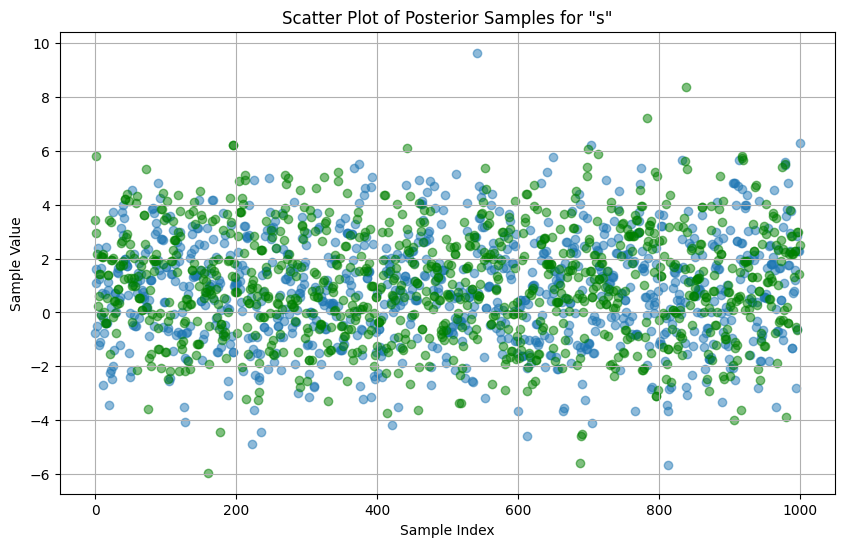

In [19]:
samples = trace.posterior["x"][0]
samples2 = trace.posterior["x"][1]
xs = np.arange(len(samples))

plt.figure(figsize=(10, 6))
plt.scatter(xs, samples, alpha=0.5)
plt.scatter(xs, samples2, alpha=0.5, color='green')

plt.title('Amostras "x"')
plt.show()

O objeto `trace` gerado após a amostragem de um modelo no PyMC armazena uma riqueza de informações sobre as amostras coletadas para cada variável do modelo, incluindo a variável `x`. Dentro do `trace`, o campo `posterior` é onde essas informações são mantidas, organizadas de maneira que facilita o acesso e a análise posterior.


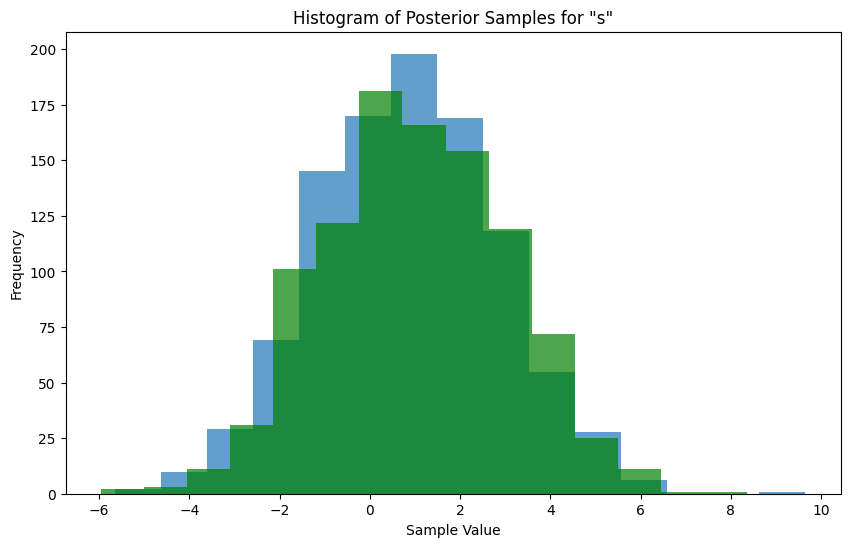

In [24]:
bs = 15

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=bs, alpha=0.7)
plt.hist(samples2, bins=bs, alpha=0.7, color='green')

plt.title('Histograma para "x"')

plt.show()

## Arviz

O ArviZ é uma biblioteca de software livre projetada para trabalhar em conjunto com o PyMC, oferecendo recursos avançados para a interpretação e visualização de dados amostrados em análises estatísticas Bayesianas. Ele fornece uma ampla gama de ferramentas estatísticas e gráficas que facilitam a exploração, compreensão e comunicação dos resultados de inferências Bayesianas, desde a geração de sumários estatísticos até a produção de gráficos detalhados como traceplots, forest plots e gráficos de densidade posterior. Com o ArviZ, cientistas de dados podem extrair *insights* mais profundos de seus modelos Bayesianos, tornando a análise dos dados amostrados mais acessível e informativa.


<Axes: title={'center': 's'}>

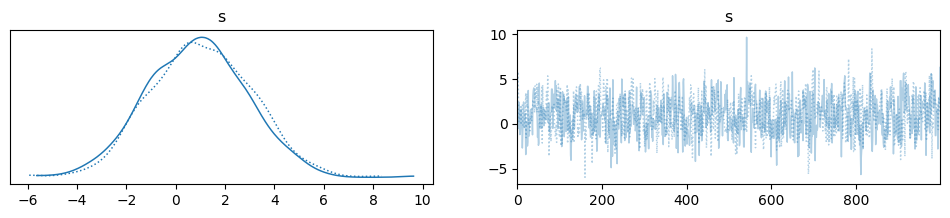

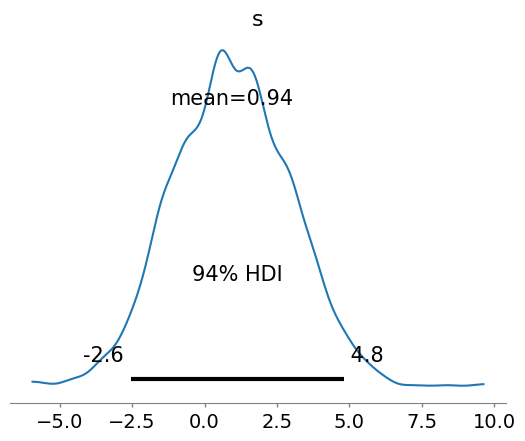

In [31]:
import arviz as az
az.plot_trace(trace)
az.plot_posterior(trace,hdi_prob=0.94)

## Primeiro Modelo: Análise de Viés em uma Moeda com PyMC

Este modelo serve como uma introdução prática ao pensamento Bayesiano e ao uso da biblioteca PyMC, aplicados ao contexto clássico de avaliar o viés de uma moeda. Frequentemente, ao lidar com problemas de inferência, estamos interessados em entender as características subjacentes de um processo ou fenômeno baseados em observações. Neste caso, a questão é determinar se uma moeda possui viés, ou seja, se a probabilidade de cair cara ou coroa é diferente de 50%.

### Contexto do Problema

Consideramos um experimento onde uma moeda é lançada 1000 vezes, e observamos o número de caras. Estamos interessados em estimar o parâmetro $\theta$, que representa a probabilidade de obter cara em um único lançamento da moeda. Neste cenário, $\theta = 0.5$ indicaria uma moeda justa (sem viés), enquanto valores de $\theta$ diferentes de 0.5 sugeririam um viés na moeda.

### Construindo o Modelo Bayesiano

Para abordar esse problema com o PyMC, construímos um modelo Bayesiano que estima $\theta$ a partir das observações coletadas. O modelo é composto por:

- **Priori para $\theta$**: Uma distribuição a priori que representa nosso conhecimento ou suposições sobre $\theta$ antes de observar os dados. Uma escolha comum é a distribuição Beta, que é uma distribuição conveniente para parâmetros de probabilidade, como $\theta$. Por exemplo, `pm.Beta("theta", alpha=1, beta=1)`, que corresponde a uma priori uniforme, indicando que, inicialmente, consideramos todas as probabilidades de viés igualmente plausíveis. Ou seja, nesse caso não colocamos muito conhecimento prévio na probabilidade da moeda (*flat prior*).

- **Função de Verossimilhança**: Uma função que relaciona as observações com o parâmetro $\theta$. No caso de lançamentos de moeda, uma distribuição Binomial é apropriada, pois modela o número de sucessos em uma sequência de ensaios independentes. Assim, se observarmos $y$ caras em $n$ lançamentos, a verossimilhança pode ser expressa como `pm.Binomial("y", n=1000, p=theta, observed=y_obs)`.


In [33]:
# Dados observados
moedas = [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

print(moedas)
print(len(moedas))

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 

In [ ]:
with pm.Model() as model:
   theta = pm.Uniform("theta",0,1)
   p = pm.Binomial("p",len(moedas),theta,observed=sum(moedas))

In [ ]:
with model:
   trace = pm.sample()

In [ ]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.529,0.016,0.498,0.558,0.001,0.0,823.0,1422.0,1.0
